In [1]:
import numpy as np
import pandas as pd
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

C:\Users\arraa\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Corona_tweets.csv',encoding='latin1')

In [3]:
print(" Shape of the dataframe", df.shape)

 Shape of the dataframe (41157, 4)


In [4]:
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (41157, 4)


In [5]:
null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
    column name  Total missing  Percent missing
0     Location           8590         0.208713
1    User_name              0         0.000000
2         Time              0         0.000000
3         text              0         0.000000


<b>Data preprocessing</b>

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['text'].apply(tokenizer.tokenize)
words_descriptions.head()

0    [MeNyrbie, Phil_Gahan, Chrisitv, https, t, co,...
1    [advice, Talk, to, your, neighbours, family, t...
2    [Coronavirus, Australia, Woolworths, to, give,...
3    [My, food, stock, is, not, the, only, one, whi...
4    [Me, ready, to, go, at, supermarket, during, t...
Name: text, dtype: object

In [7]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

1355318 words total, with a vocabulary size of 93958


In [8]:
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(100)

[('the', 40443),
 ('to', 37569),
 ('t', 29328),
 ('co', 24055),
 ('https', 24007),
 ('and', 23283),
 ('of', 21318),
 ('a', 18073),
 ('in', 17997),
 ('coronavirus', 14237),
 ('for', 13408),
 ('19', 12597),
 ('is', 11706),
 ('are', 10890),
 ('I', 9639),
 ('on', 9130),
 ('COVID', 8529),
 ('you', 8444),
 ('s', 7814),
 ('at', 7455),
 ('prices', 7300),
 ('store', 6538),
 ('this', 6255),
 ('supermarket', 6210),
 ('food', 6201),
 ('that', 6133),
 ('with', 6041),
 ('have', 5914),
 ('grocery', 5481),
 ('be', 5431),
 ('as', 5241),
 ('it', 5225),
 ('amp', 5196),
 ('from', 5005),
 ('people', 4875),
 ('all', 4331),
 ('your', 4302),
 ('we', 4232),
 ('The', 4199),
 ('will', 4197),
 ('not', 3904),
 ('can', 3815),
 ('out', 3724),
 ('up', 3701),
 ('has', 3700),
 ('by', 3593),
 ('or', 3571),
 ('our', 3533),
 ('COVID19', 3419),
 ('Â', 3360),
 ('my', 3318),
 ('shopping', 3295),
 ('more', 3270),
 ('they', 3209),
 ('consumer', 3197),
 ('Coronavirus', 3168),
 ('their', 3147),
 ('online', 2969),
 ('during', 290

In [9]:
import re
example = 'The quick brown fox jumps over the lazy dog.'

# remove the dots and make all words lower case
clean_example = re.sub(r'\.', '', example)
print(clean_example.split())

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [10]:
example = 'The quick brown fox jumps over the lazy dog.'

without_first = example.split()[1:]
without_last = example.split()[:-1]

list(zip(without_last, without_first))

[('The', 'quick'),
 ('quick', 'brown'),
 ('brown', 'fox'),
 ('fox', 'jumps'),
 ('jumps', 'over'),
 ('over', 'the'),
 ('the', 'lazy'),
 ('lazy', 'dog.')]

In [11]:
!pip install vaderSentiment

In [12]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [13]:
df['scores'] = df['text'].apply(lambda review: analyser.polarity_scores(review))
df.head()

,User_name,Time,Location,text,description_lengths,scores
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp..."
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp..."
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com..."
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co..."


In [14]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

,User_name,Time,Location,text,description_lengths,scores,compound
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382


In [15]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
#df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
df['Sentiment'] = df['compound'].apply(Sentimnt)


df.head()

,User_name,Time,Location,text,description_lengths,scores,compound,Sentiment
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500,Positive
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456,Positive
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382,Positive


In [16]:
var1 = df.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
sns.set_palette("Set2")
var1.style.background_gradient()

,Sentiment,text
2,Positive,18271
0,Negative,15389
1,Neutral,7497


(-1.183929807976652,
 1.1196598339931387,
 -1.1944694820301853,
 1.119201516384812)

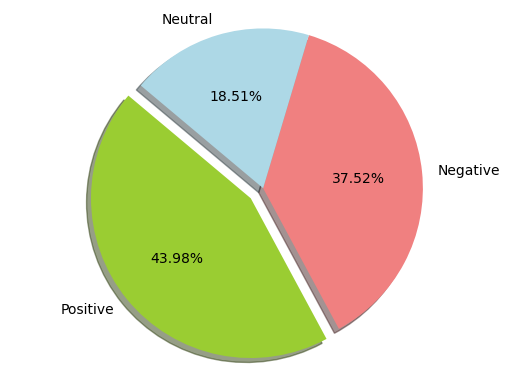

In [17]:
lab='Positive','Negative','Neutral'
explode=(0.1,0,0)
colors = ['yellowgreen', 'lightcoral','lightblue']
x = [18100, 15441, 7617]
plt.pie(x, explode=explode, labels=lab, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal')

In [18]:
df['temp_list'] = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
#temp.style.background_gradient(cmap='Blues')

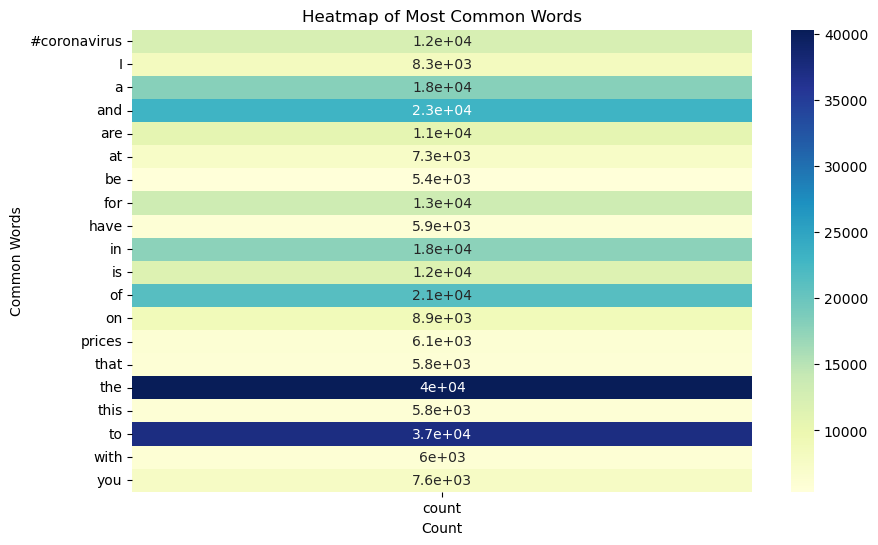

In [19]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'temp' is your DataFrame containing data
# For example, let's create a sample DataFrame:
# Pivot the DataFrame to create a matrix suitable for heatmap
heatmap_data = temp.pivot_table(index='Common_words', aggfunc='sum')

# Now, create the heatmap using seaborn or Plotly
# Using seaborn:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Most Common Words')
plt.xlabel('Count')
plt.ylabel('Common Words')
plt.show()

# Using Plotly:
# fig = px.imshow(heatmap_data, x=heatmap_data.columns, y=heatmap_data.index)
# fig.update_layout(title='Heatmap of Most Common Words')
# fig.show()

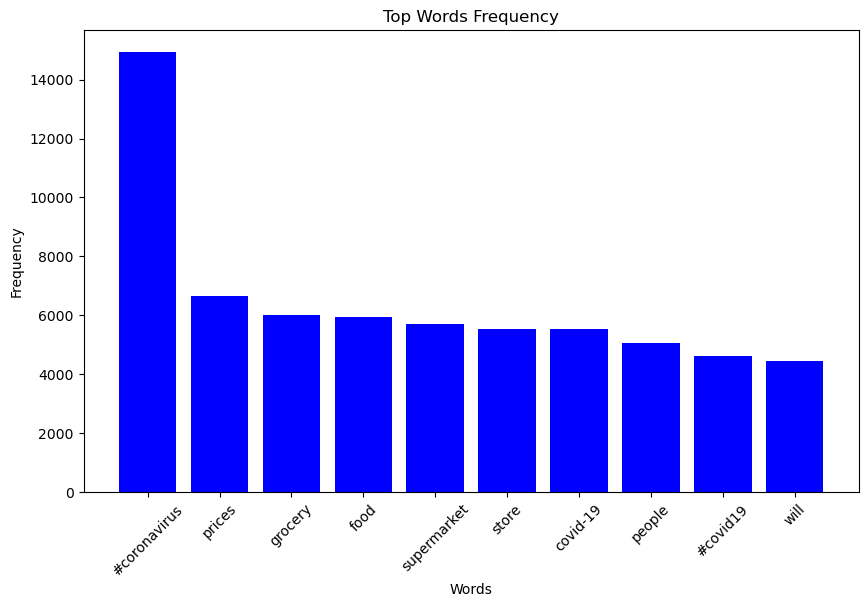

In [20]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Initialize the list for token storage
tokens_list = []

# Assume df.text contains the text data
for val in df.text:
    # Convert each value to string and split into words
    tokens = str(val).lower().split()
    # Append non-stop words to the token list
    tokens_list.extend([token for token in tokens if token not in STOPWORDS])

# Count the frequency of each word
word_freq = Counter(tokens_list)

# Number of words to display
num_words = 10

# Get the most common words
most_common_words = word_freq.most_common(num_words)

# Extract words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words Frequency')
plt.xticks(rotation=45)
plt.show()

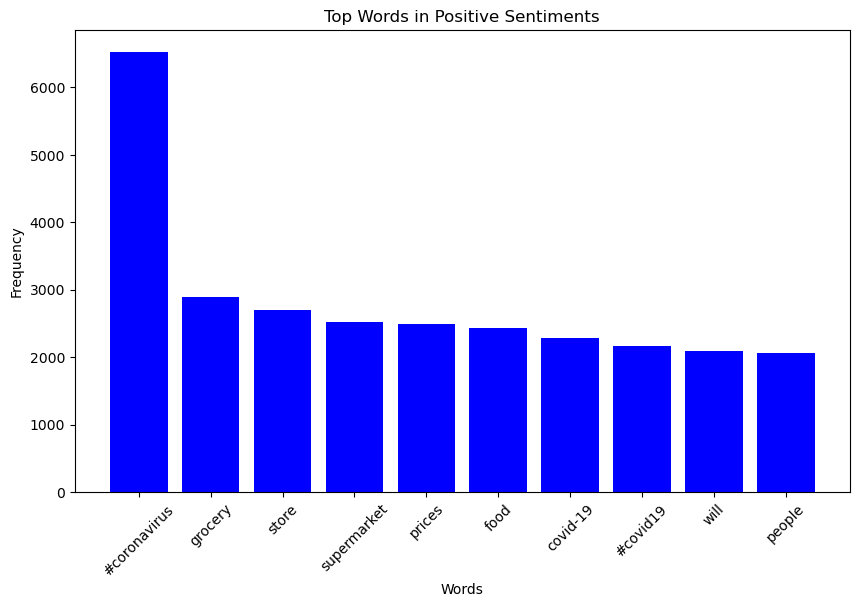

In [21]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Initialize the list for token storage
tokens_list = []

# Filter the DataFrame for positive sentiments
df_positive = df[df["Sentiment"] == "Positive"]

# Iterate through the positive sentiment text data
for val in df_positive.text:
    # Convert each value to string, split into words, and convert to lowercase
    tokens = str(val).lower().split()
    # Append non-stop words to the token list
    tokens_list.extend([token for token in tokens if token not in STOPWORDS])

# Count the frequency of each word
word_freq = Counter(tokens_list)

# Number of words to display
num_words = 10

# Get the most common words
most_common_words = word_freq.most_common(num_words)

# Extract words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words in Positive Sentiments')
plt.xticks(rotation=45)
plt.show()

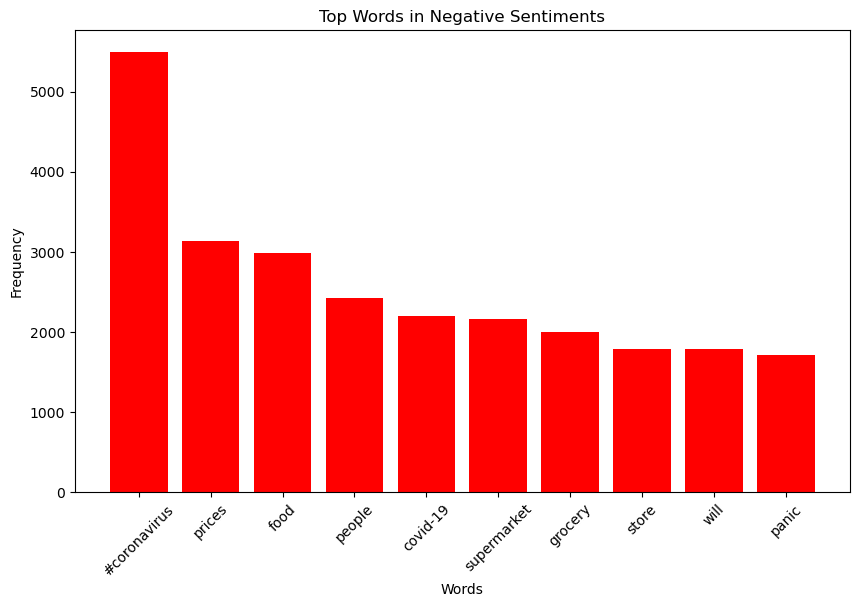

In [22]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Initialize the list for token storage
tokens_list = []

# Filter the DataFrame for negative sentiments
df_negative = df[df["Sentiment"] == "Negative"]

# Iterate through the negative sentiment text data
for val in df_negative.text:
    # Convert each value to string, split into words, and convert to lowercase
    tokens = str(val).lower().split()
    # Append non-stop words to the token list
    tokens_list.extend([token for token in tokens if token not in STOPWORDS])

# Count the frequency of each word
word_freq = Counter(tokens_list)

# Number of words to display
num_words = 10

# Get the most common words
most_common_words = word_freq.most_common(num_words)

# Extract words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words in Negative Sentiments')
plt.xticks(rotation=45)
plt.show()

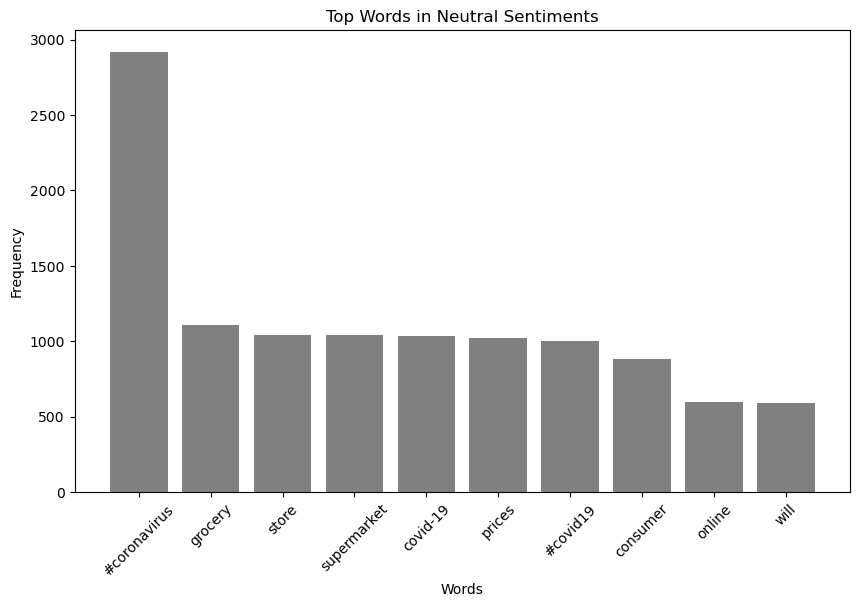

In [23]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Initialize the list for token storage
tokens_list = []

# Filter the DataFrame for neutral sentiments
df_neutral = df[df["Sentiment"] == "Neutral"]

# Iterate through the neutral sentiment text data
for val in df_neutral.text:
    # Convert each value to string, split into words, and convert to lowercase
    tokens = str(val).lower().split()
    # Append non-stop words to the token list
    tokens_list.extend([token for token in tokens if token not in STOPWORDS])

# Count the frequency of each word
word_freq = Counter(tokens_list)

# Number of words to display
num_words = 10

# Get the most common words
most_common_words = word_freq.most_common(num_words)

# Extract words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='gray')  # Color changed to gray to reflect neutrality
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words in Neutral Sentiments')
plt.xticks(rotation=45)
plt.show()


In [24]:
del df_neutral
del df_positive
del df_negative

In [25]:
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob, Word, Blobber

In [26]:
df['TB_score']= df.text.apply(lambda x: TextBlob(x).sentiment)
df.head()

,User_name,Time,Location,text,description_lengths,scores,compound,Sentiment,temp_list,TB_score
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[@MeNyrbie, @Phil_Gahan, @Chrisitv, https://t....","(0.0, 0.0)"
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500,Positive,"[advice, Talk, to, your, neighbours, family, t...","(0.16666666666666666, 0.20512820512820512)"
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive,"[Coronavirus, Australia:, Woolworths, to, give...","(-0.2, 0.3)"
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456,Positive,"[My, food, stock, is, not, the, only, one, whi...","(0.20000000000000004, 0.625)"
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382,Positive,"[Me,, ready, to, go, at, supermarket, during, ...","(-0.07777777777777777, 0.5555555555555555)"


In [27]:
df['TB_sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment[0])
df.head()

,User_name,Time,Location,text,description_lengths,scores,compound,Sentiment,temp_list,TB_score,TB_sentiment
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[@MeNyrbie, @Phil_Gahan, @Chrisitv, https://t....","(0.0, 0.0)",0.000000
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500,Positive,"[advice, Talk, to, your, neighbours, family, t...","(0.16666666666666666, 0.20512820512820512)",0.166667
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive,"[Coronavirus, Australia:, Woolworths, to, give...","(-0.2, 0.3)",-0.200000
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456,Positive,"[My, food, stock, is, not, the, only, one, whi...","(0.20000000000000004, 0.625)",0.200000
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382,Positive,"[Me,, ready, to, go, at, supermarket, during, ...","(-0.07777777777777777, 0.5555555555555555)",-0.077778


In [28]:
df['TB_sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
def Sentimnt_tb(x):
    if x >= 0.05:
        return "Positive"
    elif x <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply Sentimnt_tb function to each element in the 'TB_sentiment' column
df['Sentiment_tb'] = df['TB_sentiment'].apply(Sentimnt_tb)

df.head()

,User_name,Time,Location,text,description_lengths,scores,compound,Sentiment,temp_list,TB_score,TB_sentiment,Sentiment_tb
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[@MeNyrbie, @Phil_Gahan, @Chrisitv, https://t....","(0.0, 0.0)",0.000000,Neutral
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500,Positive,"[advice, Talk, to, your, neighbours, family, t...","(0.16666666666666666, 0.20512820512820512)",0.166667,Positive
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive,"[Coronavirus, Australia:, Woolworths, to, give...","(-0.2, 0.3)",-0.200000,Negative
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456,Positive,"[My, food, stock, is, not, the, only, one, whi...","(0.20000000000000004, 0.625)",0.200000,Positive
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382,Positive,"[Me,, ready, to, go, at, supermarket, during, ...","(-0.07777777777777777, 0.5555555555555555)",-0.077778,Negative


In [29]:
var1 = df.groupby('Sentiment_tb').count()['text'].reset_index().sort_values(by='text',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

,Sentiment_tb,text
2,Positive,18004
1,Neutral,14962
0,Negative,8191


(-1.1849274127492622,
 1.1129033644566035,
 -1.1942631424246863,
 1.1264884375404007)

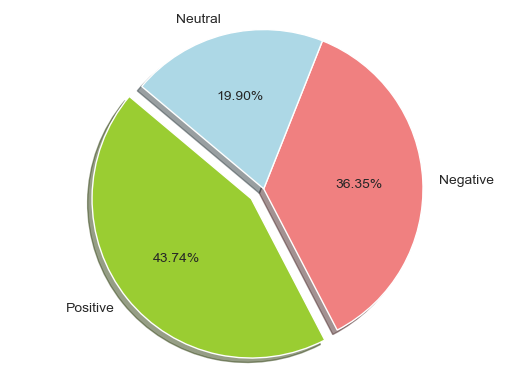

In [30]:
lab='Positive','Negative','Neutral'
explode=(0.1,0,0)
colors = ['yellowgreen', 'lightcoral','lightblue']
x = [18004, 14962, 8191]
plt.pie(x, explode=explode, labels=lab, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal')

In [31]:
pip install afinn


Note: you may need to restart the kernel to use updated packages.


In [32]:
from afinn import Afinn
afinn = Afinn()
df['Sentiment_Score'] = df['text'].apply(lambda x: afinn.score(x))

# Classify sentiment based on the score
df['Sentiment_af'] = df['Sentiment_Score'].apply(lambda score: "Positive" if score > 0 else "Negative" if score < 0 else "Neutral")

In [33]:
df.head()

,User_name,Time,Location,text,description_lengths,scores,compound,Sentiment,temp_list,TB_score,TB_sentiment,Sentiment_tb,Sentiment_Score,Sentiment_af
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[@MeNyrbie, @Phil_Gahan, @Chrisitv, https://t....","(0.0, 0.0)",0.000000,Neutral,0.0,Neutral
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500,Positive,"[advice, Talk, to, your, neighbours, family, t...","(0.16666666666666666, 0.20512820512820512)",0.166667,Positive,1.0,Positive
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive,"[Coronavirus, Australia:, Woolworths, to, give...","(-0.2, 0.3)",-0.200000,Negative,0.0,Neutral
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456,Positive,"[My, food, stock, is, not, the, only, one, whi...","(0.20000000000000004, 0.625)",0.200000,Positive,0.0,Neutral
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382,Positive,"[Me,, ready, to, go, at, supermarket, during, ...","(-0.07777777777777777, 0.5555555555555555)",-0.077778,Negative,-7.0,Negative


In [34]:
var1 = df.groupby('Sentiment_af').count()['text'].reset_index().sort_values(by='text',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

,Sentiment_af,text
0,Negative,16807
2,Positive,14285
1,Neutral,10065


(-1.1227207127591816,
 1.2210958237245186,
 -1.1554881232799532,
 1.1252332082268528)

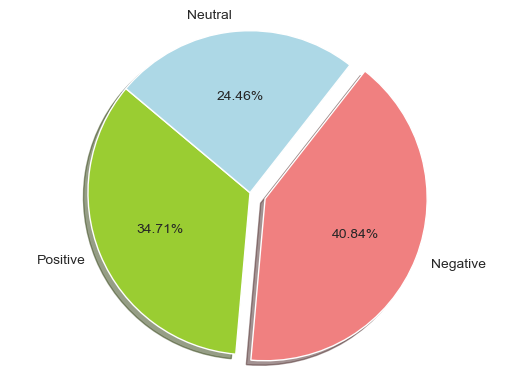

In [35]:
lab='Positive','Negative','Neutral'
explode=(0,0.1,0)
colors = ['yellowgreen', 'lightcoral','lightblue']
x = [14285, 16807, 10065]
plt.pie(x, explode=explode, labels=lab, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal')